In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6928460662118944225
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6980023082967983470
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar100
from keras.utils import to_categorical

# Load CIFAR100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

print(train_labels.shape, test_labels.shape)



(50000, 100) (10000, 100)


In [3]:
# AlexNet model architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# # 3rd Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# # 4th Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(100))  # Changed to 100 for CIFAR-100
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [4]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(train_images, train_labels, epochs=90, 
#           validation_data=(test_images, test_labels))

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels))

Epoch 1/90
1563/1563 [==============================] - 15s 8ms/step - loss: 4.4627 - accuracy: 0.0418 - val_loss: 3.9581 - val_accuracy: 0.1215
Epoch 2/90
1563/1563 [==============================] - 12s 7ms/step - loss: 4.0623 - accuracy: 0.0790 - val_loss: 3.7650 - val_accuracy: 0.1560
Epoch 3/90
1563/1563 [==============================] - 11s 7ms/step - loss: 3.9022 - accuracy: 0.1046 - val_loss: 3.6714 - val_accuracy: 0.1716
Epoch 4/90
1563/1563 [==============================] - 11s 7ms/step - loss: 3.7896 - accuracy: 0.1248 - val_loss: 3.5531 - val_accuracy: 0.1972
Epoch 5/90
1563/1563 [==============================] - 10s 7ms/step - loss: 3.7172 - accuracy: 0.1381 - val_loss: 3.4901 - val_accuracy: 0.2123
Epoch 6/90
1563/1563 [==============================] - 12s 8ms/step - loss: 3.6401 - accuracy: 0.1553 - val_loss: 3.4383 - val_accuracy: 0.2133
Epoch 7/90
1563/1563 [==============================] - 11s 7ms/step - loss: 3.5809 - accuracy: 0.1646 - val_loss: 3.4048 - val_ac

1563/1563 [==============================] - 10s 7ms/step - loss: 1.7698 - accuracy: 0.5586 - val_loss: 2.6960 - val_accuracy: 0.3487
Epoch 58/90
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7306 - accuracy: 0.5637 - val_loss: 2.7709 - val_accuracy: 0.3369
Epoch 59/90
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7048 - accuracy: 0.5730 - val_loss: 2.8818 - val_accuracy: 0.3290
Epoch 60/90
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6813 - accuracy: 0.5782 - val_loss: 2.7472 - val_accuracy: 0.3467
Epoch 61/90
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6386 - accuracy: 0.5910 - val_loss: 2.8146 - val_accuracy: 0.3394
Epoch 62/90
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6068 - accuracy: 0.5970 - val_loss: 2.7880 - val_accuracy: 0.3449
Epoch 63/90
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5792 - accuracy: 0.6043 - val_loss: 2.7893 - val_accurac

In [5]:
#cifar100, 3, 4번째 레이어 삭제(주석처리)

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


313/313 [==============================] - 1s 2ms/step - loss: 3.2067 - accuracy: 0.3227
Test loss: 3.2066853046417236
Test accuracy: 0.32269999384880066


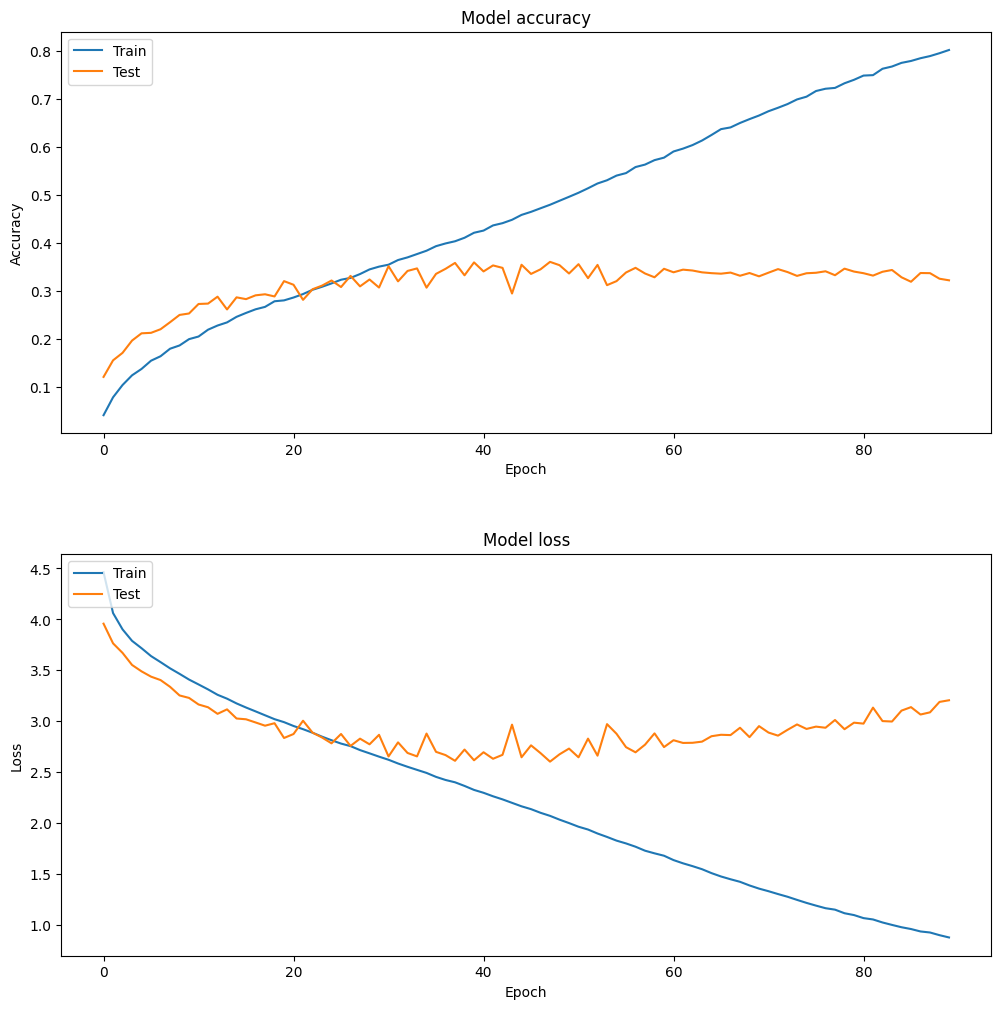

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()
